In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings

%matplotlib inline
warnings.simplefilter('ignore')
%timeit

In [4]:
df = pd.read_csv('creditcardfraud_normalised.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [5]:
df['class'].value_counts()

class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Seperating the data for analysis
legit = df.loc[df['class'] == 0]
fraud = df.loc[df['class'] == 1]
print('Legit_shape: ', legit.shape)
print('Fraud_shape: ', fraud.shape)

Legit_shape:  (284315, 30)
Fraud_shape:  (492, 30)


In [11]:
# Statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean          0.003437
std           0.009735
min           0.000000
25%           0.000220
50%           0.000856
75%           0.002999
max           1.000000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count    492.000000
mean       0.004757
std        0.009991
min        0.000000
25%        0.000039
50%        0.000360
75%        0.004122
max        0.082747
Name: Amount, dtype: float64

In [14]:
# compare the values for both transactions
df.groupby('class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
class,,,,,,,,,,,,,,,,,,,,,
0,0.958434,0.767192,0.837625,0.251582,0.765753,0.263044,0.265414,0.785375,0.462934,0.508925,...,0.580258,0.561460,0.510030,0.665435,0.382259,0.577903,0.425434,0.416506,0.313121,0.003437
1,0.877224,0.805495,0.715537,0.453275,0.744502,0.248967,0.231430,0.791507,0.373865,0.391269,...,0.584230,0.572983,0.510686,0.664835,0.368068,0.580233,0.433885,0.419659,0.314659,0.004757


In [15]:
# Handling the imbalanced dataset with Under Sampling
legit_sample = legit.sample(n=492)


In [16]:
# concat the fraudulent dataset with legit sampled dataset
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
74794,0.856303,0.725783,0.837292,0.327940,0.788704,0.239598,0.253771,0.755928,0.493359,0.507703,...,0.579239,0.463731,0.655064,0.401085,0.566391,0.348281,0.449280,0.311008,0.012141,1
96994,0.963158,0.782024,0.808258,0.423235,0.757736,0.259584,0.249885,0.793628,0.409458,0.453693,...,0.567161,0.498663,0.662551,0.359030,0.619570,0.446323,0.427027,0.319033,0.000293,1
191074,0.927086,0.749883,0.778823,0.272914,0.766216,0.258528,0.288456,0.770893,0.466059,0.506974,...,0.561651,0.593380,0.663188,0.303797,0.524240,0.370830,0.429719,0.320641,0.028056,1
52963,0.938084,0.756468,0.835389,0.147538,0.768825,0.305926,0.263540,0.801003,0.435780,0.494570,...,0.566094,0.514938,0.674257,0.515043,0.577271,0.352067,0.415455,0.314737,0.011627,0
245307,0.940873,0.785542,0.813744,0.227832,0.766275,0.253388,0.266139,0.794662,0.470004,0.495656,...,0.556183,0.463854,0.668953,0.452875,0.558738,0.447278,0.419957,0.314512,0.000350,0


In [17]:
new_dataset['class'].value_counts()

class
0    492
1    492
Name: count, dtype: int64

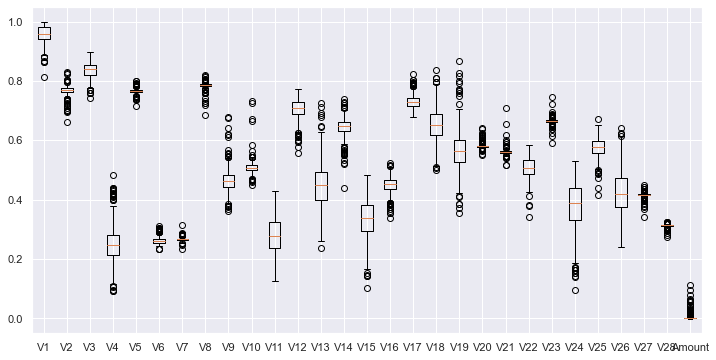

In [41]:
# inspect legit transactions
legit_inspect = legit_sample.drop(columns='class')
plt.figure(figsize=(12, 6))
sns.set()
plt.boxplot(legit_inspect, labels=legit_inspect.columns);

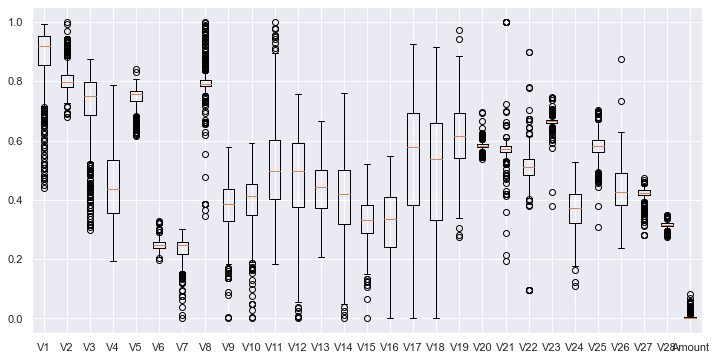

In [32]:
# inspect fraudulent transactions
fraud_inspect = fraud.drop(columns='class')
plt.figure(figsize=(12, 6))
plt.boxplot(fraud_inspect, labels=fraud_inspect.columns);


In [52]:
# check for null values
new_dataset.isna().sum()


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [55]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

X_pca = new_dataset.drop(columns='class')
pca = PCA()
pca.fit(X_pca)


PCA()

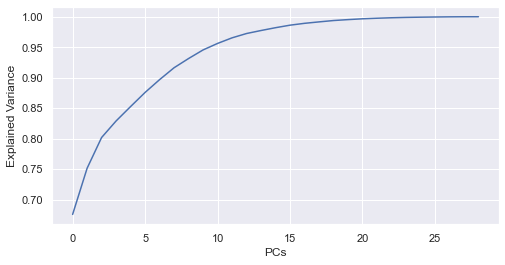

In [56]:
# plot the pca exlained variance alongside PCs
plt.figure(figsize=(8,4))
sns.set()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('PCs')
plt.ylabel('Explained Variance');

In [72]:
# return the actual 20 features (that explain 100% of variations) of PCA and their contribution to overall variations
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained_variance'])
pcs = pca.components_.shape[0]
important = [np.abs(pca.components_[i]).argmax() for i in range(pcs)]
most_important = [X_pca.columns[important[i]] for i in range(pcs)]
dic = {'PC{}'.format(i+1): most_important[i] for i in range(pcs)}
important_df = pd.DataFrame(sorted(dic.items()), columns=['PCs', 'Features'])
important_explained = pd.concat([important_df, explained_variance], axis=1)
important_explained = important_explained[:20]
unique_important_explained = important_explained.drop_duplicates('Features')
unique_important_explained

,PCs,Features,Explained_variance
0,PC1,V12,0.675557
1,PC10,V4,0.075750
2,PC11,V8,0.050486
3,PC12,V11,0.027155
5,PC14,V9,0.023159
6,PC15,V17,0.020996
7,PC16,V25,0.019543
8,PC17,V1,0.015125
9,PC18,V16,0.014104
10,PC19,V10,0.010657


In [73]:
# features with more than one PC
important_explained[important_explained.duplicated('Features')]

,PCs,Features,Explained_variance
4,PC13,V12,0.023646
17,PC25,V6,0.002357


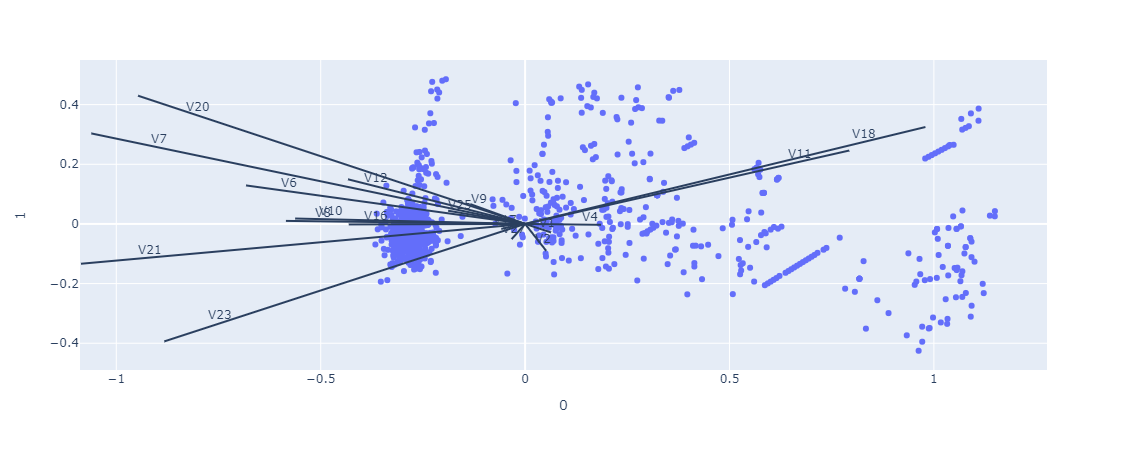

In [77]:
# plot the directions of PCs in a 2D
import plotly.express as px

scores = pca.transform(X_pca)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_cols = unique_important_explained.Features.values

fig = px.scatter(scores, x=0, y=1)
for i, feature in enumerate(feature_cols):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*6.5,
        y1=loadings[i, 1]*6.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*5.5,
        y=loadings[i, 1]*5.5,
        ax=0, ay=0,
        xanchor='center',
        yanchor='bottom',
        text=feature
    )
fig.show()    

In [126]:
# create a dataset of selected features to use for training the model
selected_col = unique_important_explained.Features.values 
train_df = new_dataset[selected_col]
train_df.shape

(984, 18)

In [188]:
# train the model- Isolation Forest
from sklearn.ensemble import IsolationForest

forest = IsolationForest(random_state=42, contamination=0.5)
forest.fit(train_df)


IsolationForest(contamination=0.5, random_state=42)

In [189]:
# predict the anomaly and set it into a dataframe
anomaly_pred = pd.DataFrame(forest.predict(train_df), columns=['Anomaly'])

In [199]:
# concatenate the predicted anomaly to the train_df
train_anomaly_df = pd.concat([train_df, anomaly_pred], axis=1)
train_anomaly_df.shape

(984, 19)

In [200]:
# concatenate the train_anomaly_df with the class label and compare the resultsb
train_anomaly_df['class'] = new_dataset['class']
train_anomaly_df.sample(5)

,V12,V4,V8,V11,V9,V17,V25,V1,V16,V10,V18,V21,V2,V23,V27,V6,V7,V20,Anomaly,class
816,0.183601,0.748013,0.728518,0.624366,0.165478,0.246814,0.537484,0.660669,0.151683,0.172399,0.161713,0.481370,0.899913,0.692778,0.360732,0.258878,0.124083,0.607188,-1,1
979,0.500009,0.329475,0.792864,0.411103,0.391646,0.598329,0.608078,0.925541,0.357196,0.393113,0.562841,0.574031,0.779136,0.674930,0.421913,0.242806,0.259977,0.593606,-1,1
910,0.676261,0.451807,0.782370,0.417347,0.399650,0.838697,0.599046,0.990471,0.520722,0.495719,0.808508,0.559147,0.787367,0.663926,0.416258,0.248738,0.271798,0.578560,-1,1
290,0.730168,0.265025,0.790334,0.342117,0.460949,0.781810,0.438411,0.959623,0.486823,0.475351,0.744881,0.557411,0.780688,0.673032,0.421881,0.255542,0.266230,0.578358,-1,0
77,0.716005,0.232135,0.793087,0.306191,0.451429,0.761649,0.581013,0.922595,0.468075,0.466827,0.714997,0.560667,0.770217,0.661685,0.414559,0.258918,0.270755,0.577816,1,0


In [185]:
train_anomaly_df

,V12,V4,V8,V11,V9,V17,V25,V1,V16,V10,...,V21,V2,V23,V27,V6,V7,V20,Anomaly,class,Flag
0,0.751161,0.262120,0.784330,0.351997,0.466763,0.735301,0.564329,0.992986,0.464654,0.503696,...,0.556436,0.768938,0.669819,0.415445,0.259836,0.266096,0.579319,1,0,
1,0.678246,0.300077,0.783871,0.228347,0.470296,0.717373,0.615518,0.978315,0.456562,0.509463,...,0.561733,0.768352,0.662949,0.416421,0.255183,0.266426,0.578892,1,0,
2,0.718987,0.260380,0.782768,0.255282,0.480974,0.715267,0.537164,0.992926,0.461636,0.510222,...,0.554153,0.766203,0.673566,0.415320,0.252111,0.265235,0.578231,1,0,
3,0.718407,0.194459,0.781429,0.271492,0.465673,0.706436,0.552765,0.947143,0.464208,0.500054,...,0.559966,0.774988,0.664487,0.416086,0.252697,0.270820,0.581931,1,0,
4,0.718451,0.238689,0.786092,0.312068,0.463983,0.720526,0.552663,0.991080,0.416967,0.528780,...,0.560161,0.753909,0.667946,0.416022,0.259632,0.258697,0.574960,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.500009,0.329475,0.792864,0.411103,0.391646,0.598329,0.608078,0.925541,0.357196,0.393113,...,0.574031,0.779136,0.674930,0.421913,0.242806,0.259977,0.593606,1,1,
980,0.587469,0.314516,0.788051,0.455267,0.423943,0.636200,0.607201,0.981714,0.380810,0.441850,...,0.567454,0.780863,0.663271,0.423694,0.249683,0.256746,0.582673,1,1,
981,0.599602,0.272690,0.798367,0.392025,0.440311,0.584823,0.536386,0.946807,0.398373,0.437055,...,0.573599,0.779143,0.668269,0.423619,0.262986,0.251741,0.582906,1,1,
982,0.514594,0.332480,0.796742,0.400264,0.406549,0.597045,0.559486,0.905394,0.368274,0.400185,...,0.570882,0.773440,0.658660,0.432844,0.233425,0.251904,0.583526,1,1,


In [201]:
# create an empty column , Flag
train_anomaly_df['Flag'] = ''


In [204]:
# assign an entry as fraudulent if is a fraud in both class and anomaly, otherwise Legit
train_anomaly_df.loc[(train_anomaly_df['Anomaly']==-1) & (train_anomaly_df['class']==1), 'Flag']='Fraud'
train_anomaly_df.loc[~((train_anomaly_df['Anomaly']==-1) & (train_anomaly_df['class']==1)), 'Flag']='Legit'

In [206]:
train_anomaly_df['Flag'].value_counts()

Flag
Legit    608
Fraud    376
Name: count, dtype: int64

In [218]:
# Reduce dataset dimensions and visualize the anomalies with t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0, n_iter=5000, perplexity=70)
tsne = tsne.fit_transform(train_df)

In [219]:
tsne_df = pd.DataFrame(tsne, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Flag'] = train_anomaly_df['Flag']

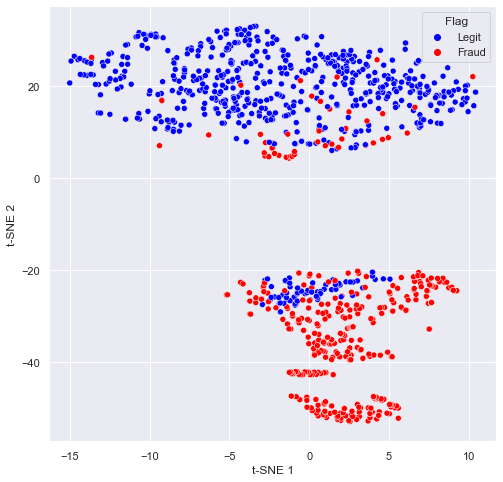

In [220]:
colors = ['blue', 'red']
plt.figure(figsize=(8, 8))
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', data=tsne_df,hue='Flag', palette=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2');